# Visualization

- Matplotlib
- Seaborn
- ggplot
- plotly
- Bokeh + ipywidgets
- Inline network displays
- GUI programming example with wxPython
- ipywidgets + networkx

TODO:
- Vispy


```
$ conda install ipywidgets wxpython networkx seaborn matplotlib
$ jupyter nbextension enable --py widgetsnbextension --sys-prefix
$ conda install -c bokeh bokeh
```

### Standard plots with Matplotlib: line, scatter, chart, contour, heatmap

Control every detail of your graphics programmatically.

Have a look at more examples:
http://matplotlib.org/gallery.html


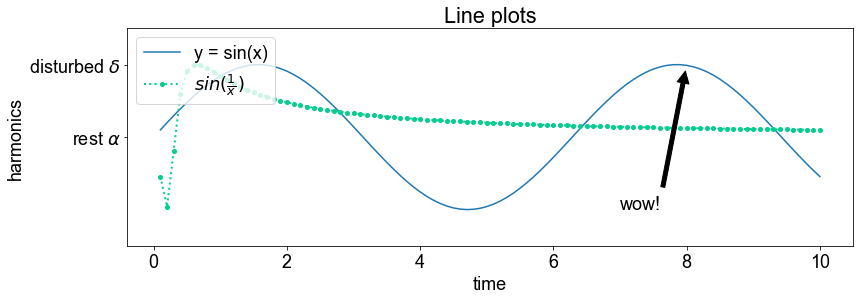

In [1]:
#ipython magic command
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'arial'})

x = np.linspace(0.1, 10, 100)
y1 = np.sin(x)
y2 = np.sin(1/x)
#y2 = np.exp(x)

fig, ax = plt.subplots(figsize=(13,4))

#axes[0].plot(x, y1, x, y2)
ax.plot(x, y1, label="y = sin(x)")
ax.plot(x, y2, label=r"$sin(\frac{1}{x})$", color="#05cd90", lw=2, ls='dotted', marker='o', markersize=4)
ax.set_xlabel('time')
ax.set_ylabel('harmonics')
ax.set_ylim([- 1.5, 1.5])
#ax.set_yscale("log")
ax.set_title("Line plots")
ax.legend(loc=2)
yticks = [0, 1]
plt.annotate('wow!', xy=(8, 1), xytext=(7, -1), arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_yticks(yticks)
ax.set_yticklabels([r"rest $\alpha$", r"disturbed $\delta$"], fontsize=18)

#fig.savefig("filename.png")
#fig.savefig("filename.png", dpi=100)
plt.show()

/home/sergiun/programs/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


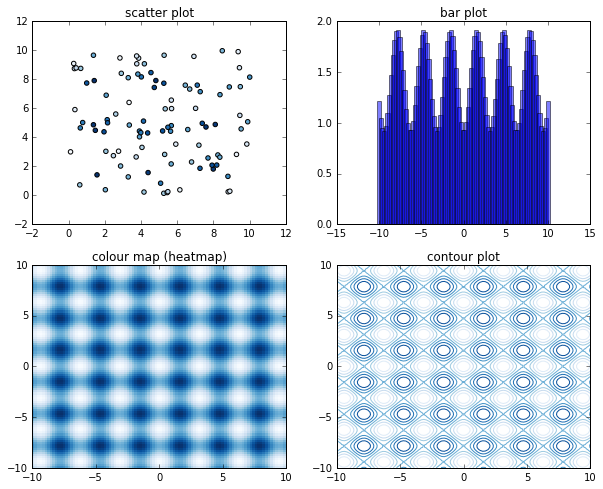

In [4]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(10,8))
matplotlib.rcParams.update({'font.size': 10, 'font.family': 'arial'})
x = 10*np.random.random(100)
y = 10*np.random.random(100)
def f(x,y): return np.sin(x)**2+np.sin(y)**2

axes[0][0].scatter(x, y, c=f(x,y), cmap=plt.cm.Blues)
axes[0][0].set_title("scatter plot")

x1 = np.linspace(-10,10,100)
y1 = np.zeros(100)+5.0
axes[0][1].bar(x1, f(x1,y1), align="center", width=0.5, alpha=0.5)
axes[0][1].set_title("bar plot")


x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

X,Y = np.meshgrid(x, y)
Z = f(X,Y)
axes[1][0].pcolor(x, y, Z, cmap=plt.cm.Blues, vmin=np.abs(Z).min(), vmax=np.abs(Z).max())
#axes[1][1].pcolor(x, y, Z, cmap=plt.cm.RdBu, vmin=np.abs(Z).min(), vmax=np.abs(Z).max())
axes[1][0].set_title("colour map (heatmap)")

axes[1][1].contour(Z.T, cmap=plt.cm.Blues, vmin=np.abs(Z).min(), vmax=np.abs(Z).max(), extent=[-10, 10, -10, 10])
axes[1][1].set_title("contour plot")


## Seaborn

Matplotlib was the first big library for visualization in Python, but after its creator tragically died more and more users migrated to Seaborn. Seaborn offers a much easier entry point to the detriment of high customization. But, it looks great! Here is a violin plot example. Check other examples in the [galery](https://seaborn.pydata.org/examples/).

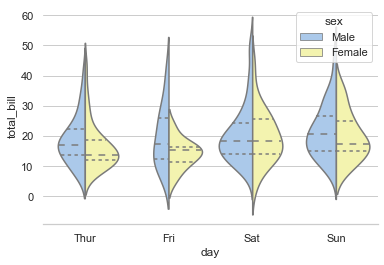

In [2]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,
               inner="quart", palette={"Male": "b", "Female": "y"})
sns.despine(left=True)

### Web publishing with plotly and Bokeh

[Bokeh](http://bokeh.pydata.org/en/latest/) is using D3, one of the most complex and performant web visualization libraries. This makes it easy to add web interaction, and also makes very nice publication quality graphics.

```
conda install bokeh
conda install -n base -c conda-forge jupyterlab_widgets
conda install -n biopy37 -c conda-forge ipywidgets
```

In [1]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [2]:
x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5))
r = p.line(x, y, color="#2222aa", line_width=3)

In [3]:
def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()

In [4]:
show(p, notebook_handle=True)

### Using Jupyter's ipywidgets

`conda install -c conda-forge ipywidgets`

In [5]:
from IPython.display import display
from ipywidgets import *
interact(update, f=["sin", "cos", "tan"], w=(0,100), A=(1,5), phi=(0, 20, 0.1))

interactive(children=(Dropdown(description='f', options=('sin', 'cos', 'tan'), value='sin'), IntSlider(value=1…

<function __main__.update(f, w=1, A=1, phi=0)>

In [6]:
from IPython.display import display
from ipywidgets import *
w = IntSlider()
display(w)

IntSlider(value=0)

In [7]:
def f(x):
    return x
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

### Network layout and display

- weird decorator error, do:
```
conda install -c conda-forge decorator
```
TODO: not working with the latest matplotlib

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

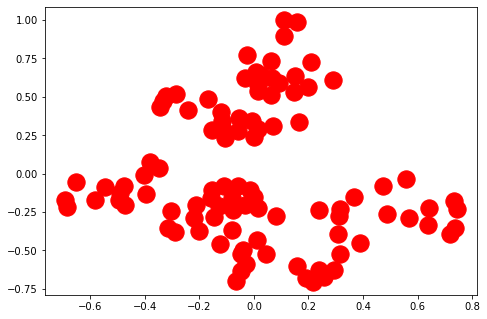

In [8]:
%matplotlib inline
import networkx as nx

net = nx.barabasi_albert_graph(100, 1)
nx.write_gml(net,"mynetwork.gml")

import matplotlib.pyplot as plt
nx.draw(net)
#nx.draw(net,pos=nx.spring_layout(net, scale = 5000, iterations = 10))

interactive(children=(IntSlider(value=16, description='n', max=30, min=2), IntSlider(value=5, description='m',…

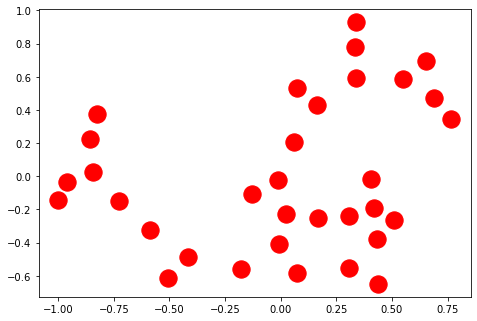

In [9]:
%matplotlib inline

from ipywidgets import interact
import matplotlib.pyplot as plt
import networkx as nx
# wrap a few graph generation functions so they have the same signature

def random_lobster(n, m, k, p):
    return nx.random_lobster(n, p, p / m)

def powerlaw_cluster(n, m, k, p):
    return nx.powerlaw_cluster_graph(n, m, p)

def erdos_renyi(n, m, k, p):
    return nx.erdos_renyi_graph(n, p)

def newman_watts_strogatz(n, m, k, p):
    return nx.newman_watts_strogatz_graph(n, k, p)

def plot_random_graph(n, m, k, p, generator):
    g = generator(n, m, k, p)
    nx.draw(g)
    plt.show()

interact(plot_random_graph, n=(2,30), m=(1,10), k=(1,10), p=(0.0, 1.0, 0.001),
        generator={'lobster': random_lobster,
                   'power law': powerlaw_cluster,
                   'Newman-Watts-Strogatz': newman_watts_strogatz,
                   u'Erdős-Rényi': erdos_renyi,
                   });

Bokeh + networkx example:

In [10]:
import networkx as nx

from bokeh.io import output_file, show
from bokeh.models import (BoxZoomTool, Circle, HoverTool,
                          MultiLine, Plot, Range1d, ResetTool,)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx

# Prepare Data
G = nx.karate_club_graph()

SAME_CLUB_COLOR, DIFFERENT_CLUB_COLOR = "black", "red"
edge_attrs = {}

for start_node, end_node, _ in G.edges(data=True):
    edge_color = SAME_CLUB_COLOR if G.nodes[start_node]["club"] == G.nodes[end_node]["club"] else DIFFERENT_CLUB_COLOR
    edge_attrs[(start_node, end_node)] = edge_color

nx.set_edge_attributes(G, edge_attrs, "edge_color")

# Show with Bokeh
plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Graph Interaction Demonstration"

node_hover_tool = HoverTool(tooltips=[("index", "@index"), ("club", "@club")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.8, line_width=1)
plot.renderers.append(graph_renderer)

#output_file("interactive_graphs.html")
output_notebook()
show(plot)

Loading BokehJS ...

Example of network interactivity in Jupyter:
- https://github.com/cytoscape/cytoscape-jupyter-widget
- https://ipycytoscape.readthedocs.io/en/latest/


## ipywidgets

In [1]:
from ipywidgets import widgets 

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot(amplitude, color):
    fig, ax = plt.subplots(figsize=(4, 3),
                           subplot_kw={'axisbelow':True})
    ax.grid(color='w', linewidth=2, linestyle='solid')
    x = np.linspace(0, 10, 1000)
    ax.plot(x, amplitude * np.sin(x), color=color,
            lw=5, alpha=0.4)
    ax.set_xlim(0, 10)
    ax.set_ylim(-1.1, 1.1)
    return fig

from ipywidgets import interact, FloatSlider, RadioButtons

interact(plot,
         amplitude=FloatSlider(min=0.1, max=1.0, step=0.1),
         color=RadioButtons(options=['blue', 'green', 'red']))

interactive(children=(FloatSlider(value=0.1, description='amplitude', max=1.0, min=0.1), RadioButtons(descript…

<function __main__.plot(amplitude, color)>

In [12]:
from ipywidgets import *
IntSlider()

IntSlider(value=0)

In [13]:
widgets.Select(
    description='OS:',
    options=['Linux', 'Windows', 'OSX'],
)

Select(description='OS:', options=('Linux', 'Windows', 'OSX'), value='Linux')

In [14]:
import ipywidgets as widgets
from IPython.display import display
name = widgets.Text(description='Name:', padding=4)
#name.layout.padding = 4
color = widgets.Dropdown(description='Color:', options=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])
#color.layout.padding = 4
page1 = widgets.Box(children=[name, color])
#page1.layout.padding = 4

age = widgets.IntSlider(description='Age:', min=0, max=120, value=50)
#age.layout.padding = 4
gender = widgets.RadioButtons(description='Gender:', options=['male', 'female'])
#gender.layout.padding = 4
page2 = widgets.Box(children=[age, gender])
#page2.layout.padding = 4

tabs = widgets.Tab(children=[page1, page2])
display(tabs)

tabs.set_title(0, 'Name')
tabs.set_title(1, 'Details')